# Code template for hand-in on reconstruction attacks.

Advanced Topics in Machine Learning, U. Copenhagen, fall 2024

Created by Rasmus Pagh with minor edits by Thomas Christensen

Queries on a hidden dataset x from {-1,+1}^100 can be made via the query method below
which calls a web API that allows dot product queries with vectors in {-1,+1}^100.
To protect data, Laplace noise is added to responses. Using the techniques you have
seen in the lecture it is possible to partially reconstruct the dataset using 200 queries.
To make sure that you get a unique challenge, choose any unique string as your challenge
identifier. The web API will keep track of the number of queries made for each identifier.

# Support function for querying the web API

In [2]:
import numpy as np
import requests as rq

# Retrieve answer to challenge for a given query
def query(challenge_id, query_vector, submit=False):
    # Only alphanumeric challenge_id and vextor entries in {-1,+1} are allowed:
    assert(challenge_id.isalnum())
    assert(np.max(np.minimum(np.abs(query_vector-1),np.abs(query_vector+1)))==0)

    # if query array is 1d, make it 2d
    if query_vector.ndim == 1:
        query_vector = query_vector.reshape(1,-1)

    payload = { 'challengeid': challenge_id, 'submit': submit,
                'query': str(query_vector.tolist()) }
    response = rq.post("https://baconbreaker.pythonanywhere.com/query", data = payload).json()
    if submit == False:
        return np.array(eval(response['result']))
    else:
        return response['result']

# Making random queries to the API

In [130]:
queries

array([[ 1,  1, -1, ...,  1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       [-1,  1, -1, ..., -1,  1, -1],
       ...,
       [-1,  1,  1, ..., -1, -1, -1],
       [ 1,  1,  1, ..., -1,  1,  1],
       [-1,  1, -1, ..., -1,  1, -1]])

In [134]:
challenge_id = 'aalgisrugoribn' # identifier for hidden dataset
n = 100 # number of entries in hidden dataset
num_queries = 2*n # number of queries to be asked
queries = np.random.choice([-1,+1], size=(num_queries,n)) # Set of random queries
query_results = query(challenge_id, queries)

# Baseline reconstruction attack: Guess equals the best query

Copy the notebook and replace with your attack. The first submission for a given challenge_id is stored on the server and on the leaderboard: http://baconbreaker.pythonanywhere.com/leaderboard/?n=100

**Tip**: to solve a linear program you can use the following import:

```
from scipy.optimize import linprog
```



In [135]:
result_vector = np.where(queries.T @ query_results > 0, 1, -1)
query_result = query(challenge_id, result_vector, submit=False)
print(f"\nReconstruction attack achieves fraction {(1 + query_result / n) / 2} correct values")


Reconstruction attack achieves fraction [0.895] correct values


In [152]:
res = [0] * 50
for j in range(50):
    challenge_id = 'salskdjg' + str(j) # identifier for hidden dataset
    n = 100 # number of entries in hidden dataset
    num_queries = 2*n # number of queries to be asked

    queries = np.random.choice([-1,+1], size=(num_queries,n)) # Set of random queries
    query_results = query(challenge_id, queries)
    dot_product_query = np.where(queries.T @ (query_results) > 0, 1, -1)
    query_result = query(challenge_id, dot_product_query, submit=False)
    print(f"\nReconstruction attack achieves fraction {(1 + query_result / n) / 2} correct values")
    res[j] = float((1 + query_result / n) / 2)
np.mean(res)


Reconstruction attack achieves fraction [0.775] correct values

Reconstruction attack achieves fraction [0.855] correct values

Reconstruction attack achieves fraction [0.62] correct values

Reconstruction attack achieves fraction [0.71] correct values

Reconstruction attack achieves fraction [0.835] correct values

Reconstruction attack achieves fraction [0.805] correct values

Reconstruction attack achieves fraction [0.76] correct values

Reconstruction attack achieves fraction [0.705] correct values

Reconstruction attack achieves fraction [0.895] correct values

Reconstruction attack achieves fraction [0.88] correct values

Reconstruction attack achieves fraction [0.83] correct values

Reconstruction attack achieves fraction [0.755] correct values

Reconstruction attack achieves fraction [0.785] correct values

Reconstruction attack achieves fraction [0.78] correct values

Reconstruction attack achieves fraction [0.93] correct values

Reconstruction attack achieves fraction [0.795

0.7959999999999999

In [154]:
print(f"The algorithm reconstrucs on average fraction {np.mean(res)} correct values with a standard deviation of {np.std(res)} .")

The algorithm reconstrucs on average fraction 0.7959999999999999 correct values with a standard deviation of 0.0667682559304944 .


(array([ 2.,  1.,  3.,  4., 12.,  8., 13.,  2.,  2.,  3.]),
 array([0.62 , 0.653, 0.686, 0.719, 0.752, 0.785, 0.818, 0.851, 0.884,
        0.917, 0.95 ]),
 <BarContainer object of 10 artists>)

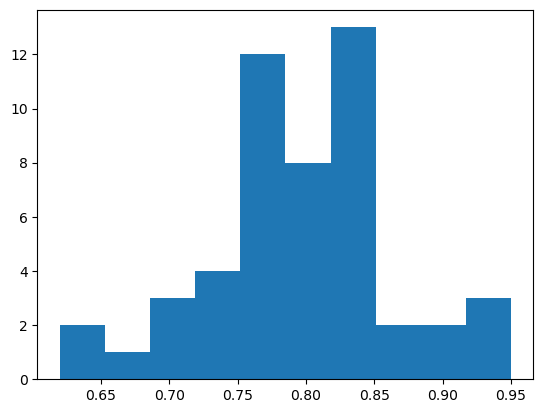

In [155]:
from matplotlib.pyplot import hist
hist(res)